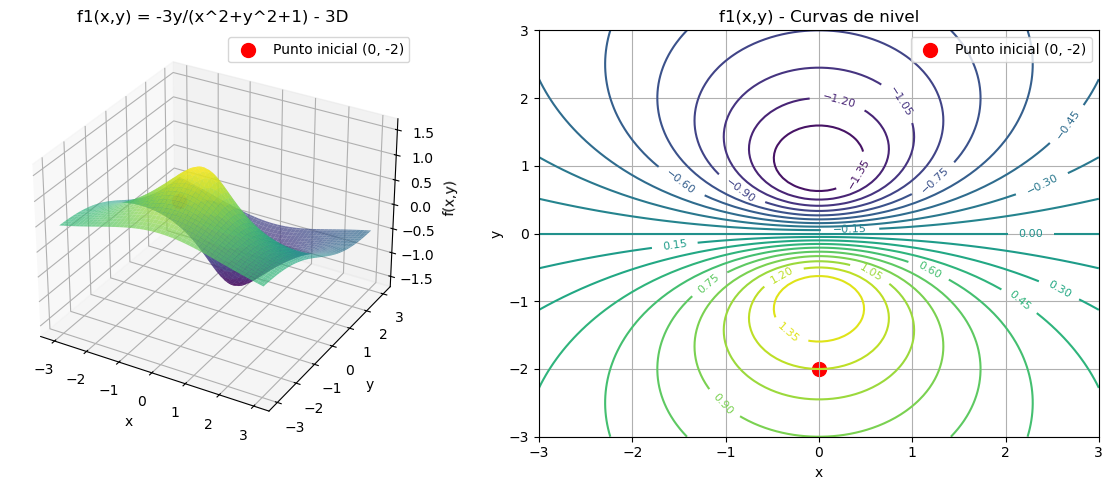


Resultados para f1:
  Método: gradient  | f(x): 1.5000 | Convergió en: 32 | Tiempo: 0.0364s | Memoria: 1.96 KB
  Método: momentum  | f(x): 1.5000 | Convergió en: 19 | Tiempo: 0.0521s | Memoria: 1.71 KB
  Método: nesterov  | f(x): 1.5000 | Convergió en: 19 | Tiempo: 0.0770s | Memoria: 1.16 KB
  Método: adagrad   | f(x): 1.5000 | Convergió en: 31 | Tiempo: 0.0537s | Memoria: 0.93 KB
  Método: rmsprop   | f(x): 1.4983 | Convergió en: 7 | Tiempo: 0.0768s | Memoria: 5.28 KB
  Método: adam      | f(x): 1.5000 | Convergió en: 15 | Tiempo: 0.1782s | Memoria: 1.83 KB

Resultados para f2:
  Método: gradient  | f(x): 0.0000 | Convergió en: 22 | Tiempo: 0.0157s | Memoria: 0.93 KB
  Método: momentum  | f(x): 0.0000 | Convergió en: 95 | Tiempo: 0.0257s | Memoria: 4.75 KB
  Método: nesterov  | f(x): 0.0000 | Convergió en: 27 | Tiempo: 0.0396s | Memoria: 1.71 KB
  Método: adagrad   | f(x): 0.4787 | Convergió en: 116 | Tiempo: 0.0376s | Memoria: 1.87 KB
  Método: rmsprop   | f(x): 0.0075 | Convergió e

In [8]:
import numpy as np
import time
import tracemalloc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones objetivo
def f1(x): # -3*y / (x^2 + y^2 + 1)
    return -3 * x[1] / (x[0]**2 + x[1]**2 + 1)

def grad_f1(x):
    x1, x2 = x
    denom = (x1**2 + x2**2 + 1)
    dfdx = (6 * x1 * x2) / (denom**2)
    dfdy = -3 * (x1**2 + x2**2 - 1) / (denom**2)
    return np.array([dfdx, dfdy])

def f2(x): # x^2 + 2y^2
    return x[0]**2 + 2 * x[1]**2

def grad_f2(x):
    return np.array([2 * x[0], 4 * x[1]])

# Función para graficar f1
def plot_f1():
    # malla de puntos
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    
    # Z para cada punto
    Z = -3 * Y / (X**2 + Y**2 + 1)
    
    # 3D figure
    fig = plt.figure(figsize=(12, 5))
    
    # graph 3D
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('f1(x,y) = -3y/(x^2+y^2+1) - 3D')
    
    # punto inicial
    x0 = np.array([0.0, -2.0])
    ax1.scatter([x0[0]], [x0[1]], [f1(x0)], color='red', s=100, label='Punto inicial (0, -2)')
    ax1.legend()
    
    # gráfica decontorno
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('f1(x,y) - Curvas de nivel')
    ax2.grid(True)
    
    # punto inicial en contorno
    ax2.scatter([x0[0]], [x0[1]], color='red', s=100, label='Punto inicial (0, -2)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# parametros
lambda_ = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_iter = 1000
tol = 0.01

# algos.
def optimize(method, func, grad_func, x0):
    x = x0.copy()
    v = np.zeros_like(x)
    s = np.zeros_like(x)
    converged_at = None
    start_time = time.time()
    tracemalloc.start()
    
    for i in range(max_iter):
        grad = grad_func(x)
        
        if method == 'gradient':
            update = -lambda_ * grad
        elif method == 'momentum':
            v = beta1 * v - lambda_ * grad
            update = v
        elif method == 'nesterov':
            lookahead = x + beta1 * v
            grad_lookahead = grad_func(lookahead)
            v = beta1 * v - lambda_ * grad_lookahead
            update = v
        elif method == 'adagrad':
            s += grad ** 2
            update = -lambda_ * grad / (np.sqrt(s) + epsilon)
        elif method == 'rmsprop':
            s = beta1 * s + (1 - beta1) * grad ** 2
            update = -lambda_ * grad / (np.sqrt(s) + epsilon)
        elif method == 'adam':
            v = beta1 * v + (1 - beta1) * grad
            s = beta2 * s + (1 - beta2) * grad ** 2
            v_hat = v / (1 - beta1 ** (i + 1))
            s_hat = s / (1 - beta2 ** (i + 1))
            update = -lambda_ * v_hat / (np.sqrt(s_hat) + epsilon)
        else:
            raise ValueError(f"Unknown method: {method}")
        
        x_new = x + update
        
        if converged_at is None and np.linalg.norm(x_new - x) < tol:
            converged_at = i + 1
        
        x = x_new
    
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    elapsed = time.time() - start_time
    return func(x), converged_at, elapsed, peak / 1024 # memoria en KB

# gráfica de f1
plot_f1()

# experimentos
methods = ['gradient', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
functions = [
    ("f1", f1, grad_f1, np.array([0.0, -2.0])),
    ("f2", f2, grad_f2, np.array([5.0, 3.0]))
]

for fname, func, grad, x0 in functions:
    print(f"\nResultados para {fname}:")
    for method in methods:
        try:
            val, conv_iter, time_used, mem_used = optimize(method, func, grad, x0)
            print(f"  Método: {method:<9} | f(x): {val:.4f} | Convergió en: {conv_iter or 'No'} | Tiempo: {time_used:.4f}s | Memoria: {mem_used:.2f} KB")
        except Exception as e:
            print(f"  Método: {method:<9} | ERROR: {str(e)}")